# Car Prices Poland from Kaggle

https://www.kaggle.com/code/qusaybtoush1990/car-prices-poland/data



In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition  import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ARDRegression, PassiveAggressiveRegressor

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/07. Youtube/03. LinearRegression Car Prices Poland/Car_Prices_Poland_Kaggle.csv', index_col=0)

In [4]:
df.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   mark             117927 non-null  object
 1   model            117927 non-null  object
 2   generation_name  87842 non-null   object
 3   year             117927 non-null  int64 
 4   mileage          117927 non-null  int64 
 5   vol_engine       117927 non-null  int64 
 6   fuel             117927 non-null  object
 7   city             117927 non-null  object
 8   province         117927 non-null  object
 9   price            117927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.9+ MB


# EDA

## Check for Null Values

In [6]:
df.isnull().sum()

mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

**Observation:**

+ generation_name has null values

## 5 Point Distribution

In [7]:
df.describe()

,year,mileage,vol_engine,price
count,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,5.690135,9.236936e+04,643.613438,8.482458e+04
min,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [8]:
df.describe(include='object')

,mark,model,generation_name,fuel,city,province
count,117927,117927,87842,117927,117927,117927
unique,23,328,364,6,4427,23
top,audi,astra,gen-8p-2003-2012,Gasoline,Warszawa,Mazowieckie
freq,12031,3331,1567,61597,7972,22219


**Observations:**

+ fuel has 6 categories
+ mark and province both have 23 categories
+ the rest have diverse set of categories and wouldn't work well for one hot encoding

# Univariate Analysis

### Change Category Data Type

In [9]:
for cat in ['province', 'fuel', 'mark']:
  df[cat] = df[cat].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   mark             117927 non-null  category
 1   model            117927 non-null  object  
 2   generation_name  87842 non-null   object  
 3   year             117927 non-null  int64   
 4   mileage          117927 non-null  int64   
 5   vol_engine       117927 non-null  int64   
 6   fuel             117927 non-null  category
 7   city             117927 non-null  object  
 8   province         117927 non-null  category
 9   price            117927 non-null  int64   
dtypes: category(3), int64(4), object(3)
memory usage: 7.5+ MB


In [11]:
df.columns

Index(['mark', 'model', 'generation_name', 'year', 'mileage', 'vol_engine',
       'fuel', 'city', 'province', 'price'],
      dtype='object')

In [12]:
features = ['mark', 'model', 'generation_name', 'year', 'mileage',
       'vol_engine', 'fuel', 'city', 'province', 'price']

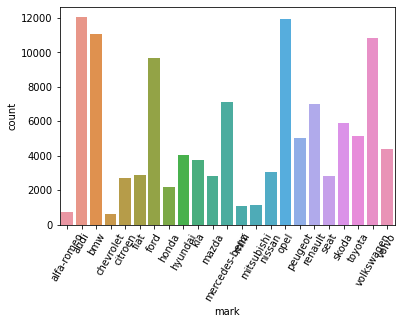

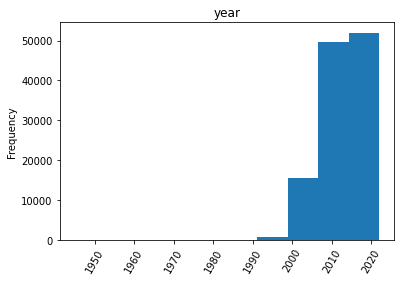

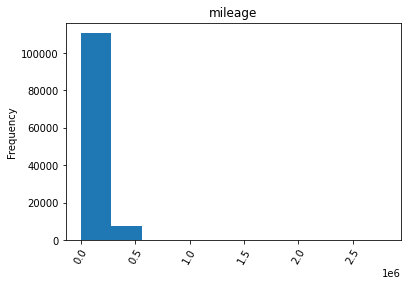

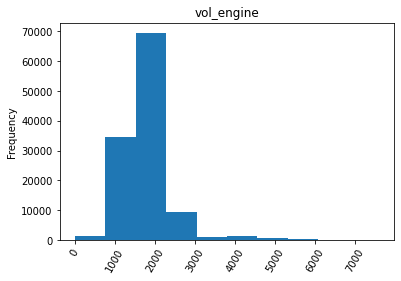

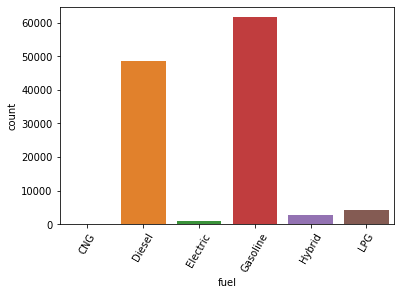

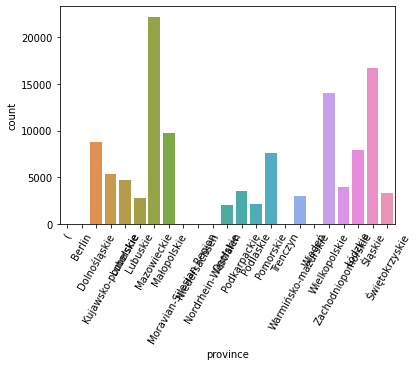

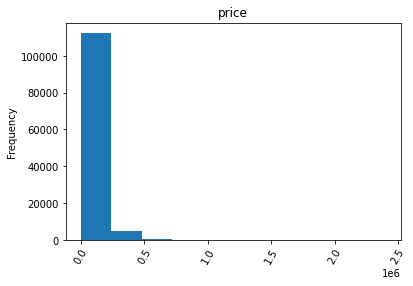

In [13]:
for feature in features:
  if df[feature].dtype == 'int':
    df[feature].plot(kind='hist')
    plt.title(feature)
    plt.xticks(rotation=60)
    plt.show()
  elif df[feature].dtype == 'category':
    sns.countplot(data=df, x=feature)
    plt.xticks(rotation=60)
    plt.show()

**Oberservations**

+ year - outliers on left side
+ mileage - outliers on the right side
+ vol_engine - outliers on the right side
+ imblance with diseal and gas and the rest of the fuel types
+ province is high in 4 and low in the rest
+ price - has outlier on right side

# Bivariate Analysis

In [14]:
df.columns

Index(['mark', 'model', 'generation_name', 'year', 'mileage', 'vol_engine',
       'fuel', 'city', 'province', 'price'],
      dtype='object')

In [15]:
features_continuous = ['year', 'mileage', 'vol_engine', 'price']

In [16]:
# sns.pairplot(df[features_continuous])

In [17]:
features_continuous.append('fuel')

In [18]:
features_continuous

['year', 'mileage', 'vol_engine', 'price', 'fuel']

In [19]:
# sns.pairplot(df[features_continuous], hue='fuel')

**oberservation**

+ diesel and gasoline have different relationship with vol_engine 

# Preprocessing

## Handling Outliers

### mileage

In [20]:
df['mileage'].describe()

count    1.179270e+05
mean     1.409768e+05
std      9.236936e+04
min      0.000000e+00
25%      6.700000e+04
50%      1.462690e+05
75%      2.030000e+05
max      2.800000e+06
Name: mileage, dtype: float64

In [21]:
df['mileage'] = df['mileage'].clip(upper=4.5e+5)

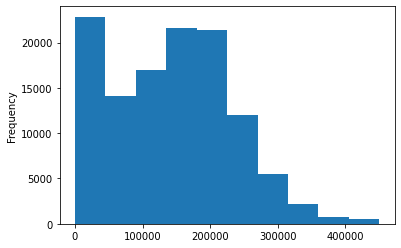

In [22]:
df['mileage'].plot(kind='hist')

### year

In [23]:
df_year = df['year'].describe()
df_year[3:].values

array([1945., 2009., 2013., 2018., 2022.])

In [24]:
df['year'] = pd.cut(df['year'], bins=df_year[3:].values, labels=['g1', 'g2', 'g3','g4'])

In [25]:
df['year'].value_counts()

g3    36388
g1    35478
g2    24681
g4    21379
Name: year, dtype: int64

### vol_engine

In [26]:
df['vol_engine'].describe()

count    117927.000000
mean       1812.057782
std         643.613438
min           0.000000
25%        1461.000000
50%        1796.000000
75%        1995.000000
max        7600.000000
Name: vol_engine, dtype: float64

In [27]:
df['vol_engine'] = df['vol_engine'].clip(lower=400, upper=3600)

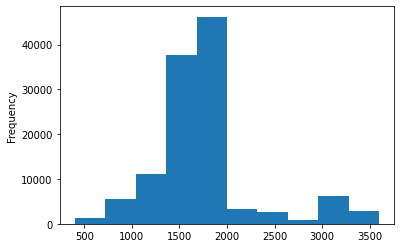

In [28]:
df['vol_engine'].plot(kind='hist')

## Handling Null Values

In [29]:
df.isnull().sum()

mark                   0
model                  0
generation_name    30085
year                   1
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [30]:
  df['generation_name'].value_counts()

gen-8p-2003-2012      1567
gen-j-2009-2015       1376
gen-a-2008-2017       1216
gen-iii-2013          1184
gen-e90-2005-2012     1152
                      ... 
gen-b-1998-2004         18
gen-b-fl-1999-2003      13
gen-b-1993-2000         13
gen-b-1994-1999          7
gen-l-2021               3
Name: generation_name, Length: 364, dtype: int64

In [31]:
df['generation_name'].fillna('unknown', inplace=True)

In [32]:
df['generation_name'].value_counts()

unknown               30085
gen-8p-2003-2012       1567
gen-j-2009-2015        1376
gen-a-2008-2017        1216
gen-iii-2013           1184
                      ...  
gen-b-1998-2004          18
gen-b-1993-2000          13
gen-b-fl-1999-2003       13
gen-b-1994-1999           7
gen-l-2021                3
Name: generation_name, Length: 365, dtype: int64

### year

In [33]:
df[df['year'].isnull()]

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
84888,fiat,500,unknown,NaN,68000.0,500,Gasoline,Kielce,Świętokrzyskie,40900


In [34]:
df[(df['mileage']>65000)&(df['mark']=='fiat')]['year'].value_counts()

g1    778
g2    568
g3    488
g4     23
Name: year, dtype: int64

In [35]:
df['year'].fillna('g1', inplace=True)

In [36]:
df.isnull().sum()

mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64

### Get Dummies

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   mark             117927 non-null  category
 1   model            117927 non-null  object  
 2   generation_name  117927 non-null  object  
 3   year             117927 non-null  category
 4   mileage          117927 non-null  float64 
 5   vol_engine       117927 non-null  int64   
 6   fuel             117927 non-null  category
 7   city             117927 non-null  object  
 8   province         117927 non-null  category
 9   price            117927 non-null  int64   
dtypes: category(4), float64(1), int64(2), object(3)
memory usage: 10.8+ MB


In [38]:
df = pd.get_dummies(df, columns=['fuel', 'year'])

In [39]:
df.head(2)

,mark,model,generation_name,mileage,vol_engine,city,province,price,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Gasoline,fuel_Hybrid,fuel_LPG,year_g1,year_g2,year_g3,year_g4
0,opel,combo,gen-d-2011,139568.0,1248,Janki,Mazowieckie,35900,0,1,0,0,0,0,0,0,1,0
1,opel,combo,gen-d-2011,31991.0,1499,Katowice,Śląskie,78501,0,1,0,0,0,0,0,0,1,0


**Preprocessing Summary**

+ 


# Modeling

## Train Test Split

In [40]:
df.columns

Index(['mark', 'model', 'generation_name', 'mileage', 'vol_engine', 'city',
       'province', 'price', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric',
       'fuel_Gasoline', 'fuel_Hybrid', 'fuel_LPG', 'year_g1', 'year_g2',
       'year_g3', 'year_g4'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117927 entries, 0 to 117926
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   mark             117927 non-null  category
 1   model            117927 non-null  object  
 2   generation_name  117927 non-null  object  
 3   mileage          117927 non-null  float64 
 4   vol_engine       117927 non-null  int64   
 5   city             117927 non-null  object  
 6   province         117927 non-null  category
 7   price            117927 non-null  int64   
 8   fuel_CNG         117927 non-null  uint8   
 9   fuel_Diesel      117927 non-null  uint8   
 10  fuel_Electric    117927 non-null  uint8   
 11  fuel_Gasoline    117927 non-null  uint8   
 12  fuel_Hybrid      117927 non-null  uint8   
 13  fuel_LPG         117927 non-null  uint8   
 14  year_g1          117927 non-null  uint8   
 15  year_g2          117927 non-null  uint8   
 16  year_g3          117

In [42]:
features = ['mileage', 'vol_engine', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric',
       'fuel_Gasoline', 'fuel_Hybrid', 'fuel_LPG', 'year_g1', 'year_g2',
       'year_g3', 'year_g4']
target = [ 'price']

In [43]:
X = df[features]
y = df[target]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

### Standardization

In [45]:
# std_scaler = StandardScaler()
# std_scaler.fit(X_train)
# X_train = std_scaler.transform(X_train)
# X_train = std_scaler.transform(X_train)

## User Def - model_maker

In [46]:
def model_maker(model=LinearRegression()):
  model.fit(X_train, y_train)
  score_train = model.score(X_train, y_train)
  score_test = model.score(X_test, y_test)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  sns.barplot(data=pd.DataFrame(model.coef_.reshape(1,12), columns=X_train.columns))
  plt.xticks(rotation=60)
  plt.show()
  return model, score_train, score_test, y_pred_train, y_pred_test

## LinearRegression

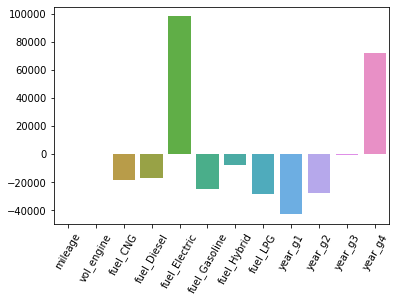

In [47]:
reg = LinearRegression(fit_intercept=True)

reg, score_train_reg, score_test_reg, y_pred_train_reg, y_pred_test_reg = model_maker(model=reg)

## Ridge

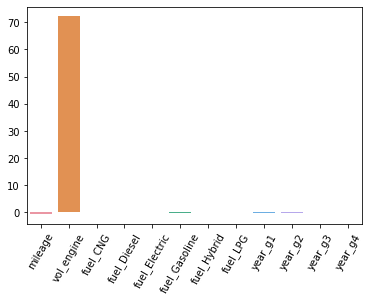

In [48]:
rng = Ridge(solver ='saga')

rng, score_train_rng, score_test_rng, y_pred_train_rng, y_pred_test_rng = model_maker(model=rng)

## Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.457e+13, tolerance: 5.935e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


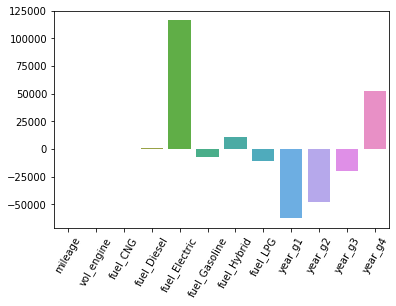

In [49]:
lasso = Lasso(alpha = .8)
lasso, score_train_lasso, score_test_lasso, y_pred_train_lasso, y_pred_test_lasso = model_maker(model=lasso)

## ARDRegression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


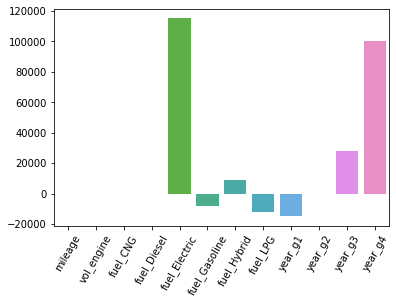

In [50]:
ard = ARDRegression(alpha_1=.9, alpha_2=.9, lambda_1=1e-7, lambda_2=1e-7)

ard, score_train_ard, score_test_ard, y_pred_train_ard, y_pred_test_ard = model_maker(model=ard)

## PassiveAgressiveRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


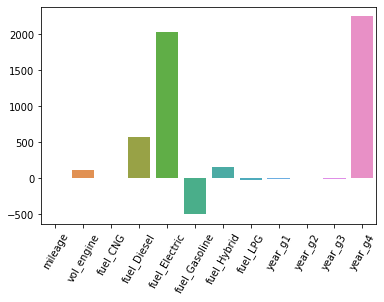

In [51]:
par = PassiveAggressiveRegressor(C=.6, loss='epsilon_insensitive', epsilon=1e-6, random_state=3)

par, score_train_par, score_test_par, y_pred_train_par, y_pred_test_par = model_maker(model=par)

# Summary

In [52]:
train_scores = [score_train_reg, score_train_rng,  score_train_lasso,  score_train_ard,  score_train_par]  
test_scores = [score_test_reg, score_test_rng,  score_test_lasso,  score_test_ard,  score_test_par]
models =['reg','rng','lasso','ard','par']
dict_scores = {
'Train score':train_scores,'Test score':test_scores}
df_score = pd.DataFrame(dict_scores, index=models)

In [53]:
df_score

,Train score,Test score
reg,0.634914,0.626352
rng,0.506735,0.502911
lasso,0.634914,0.626353
ard,0.634914,0.626357
par,0.165296,0.169180
